In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


In [2]:
df = pd.read_csv("/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv")

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
# Since the average and median values are close in most variables, I filled the nan values according to the median.

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
imputer.fit(df.iloc[:,:-1].values)
df.iloc[:,:-1] = imputer.transform(df.iloc[:,:-1].values)

In [6]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# <h1> Data Visualization

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

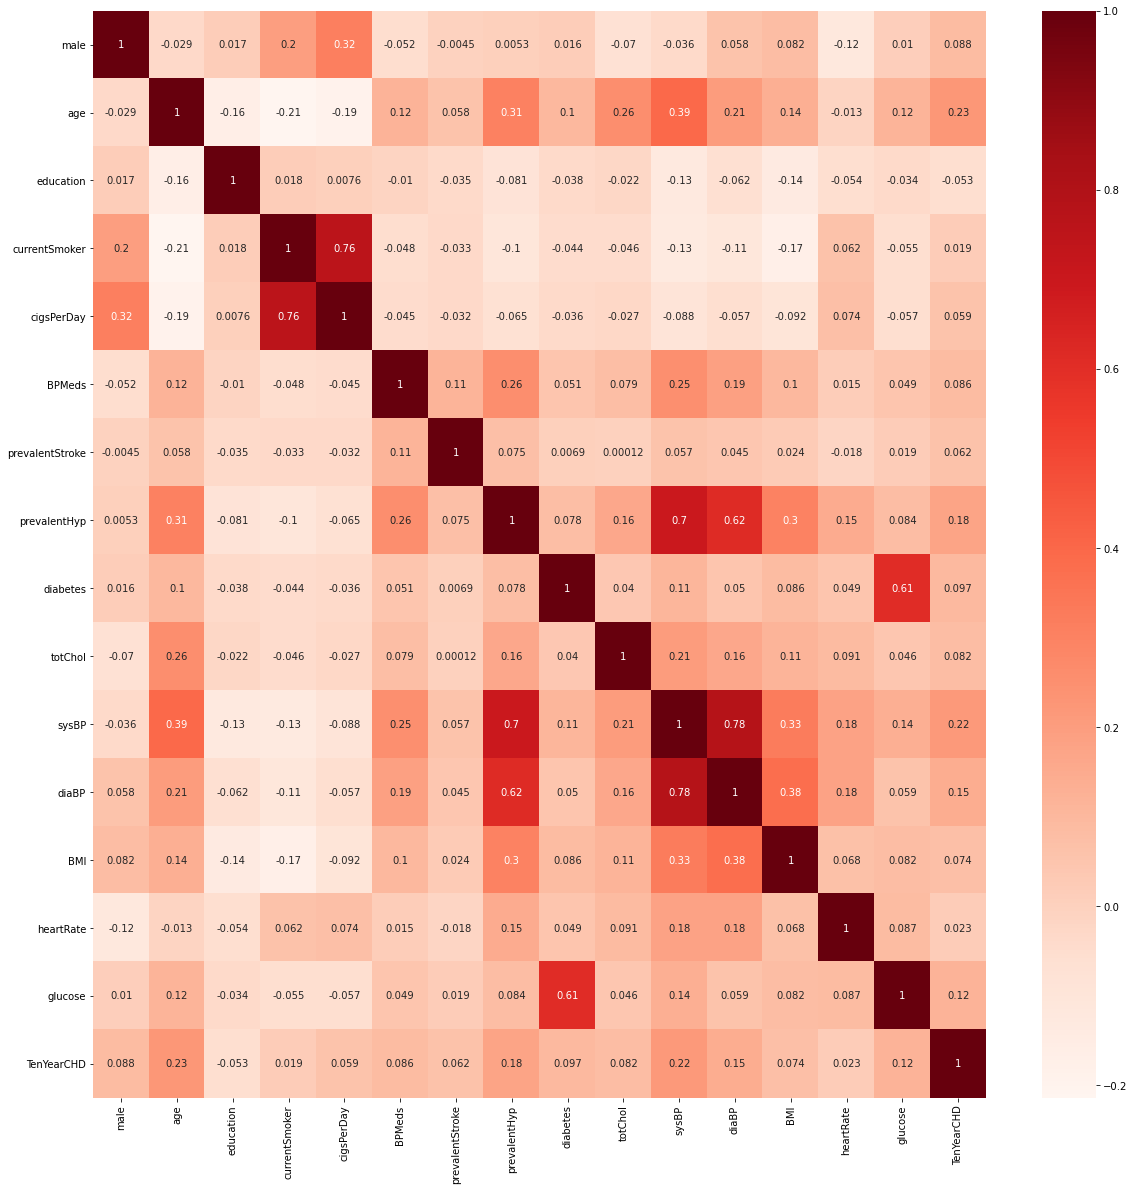

In [8]:
#Corr matrix
plt.figure(figsize=(20,20))
cor = df.corr()
sns_heat=sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
fig=sns_heat.get_figure
plt.show()

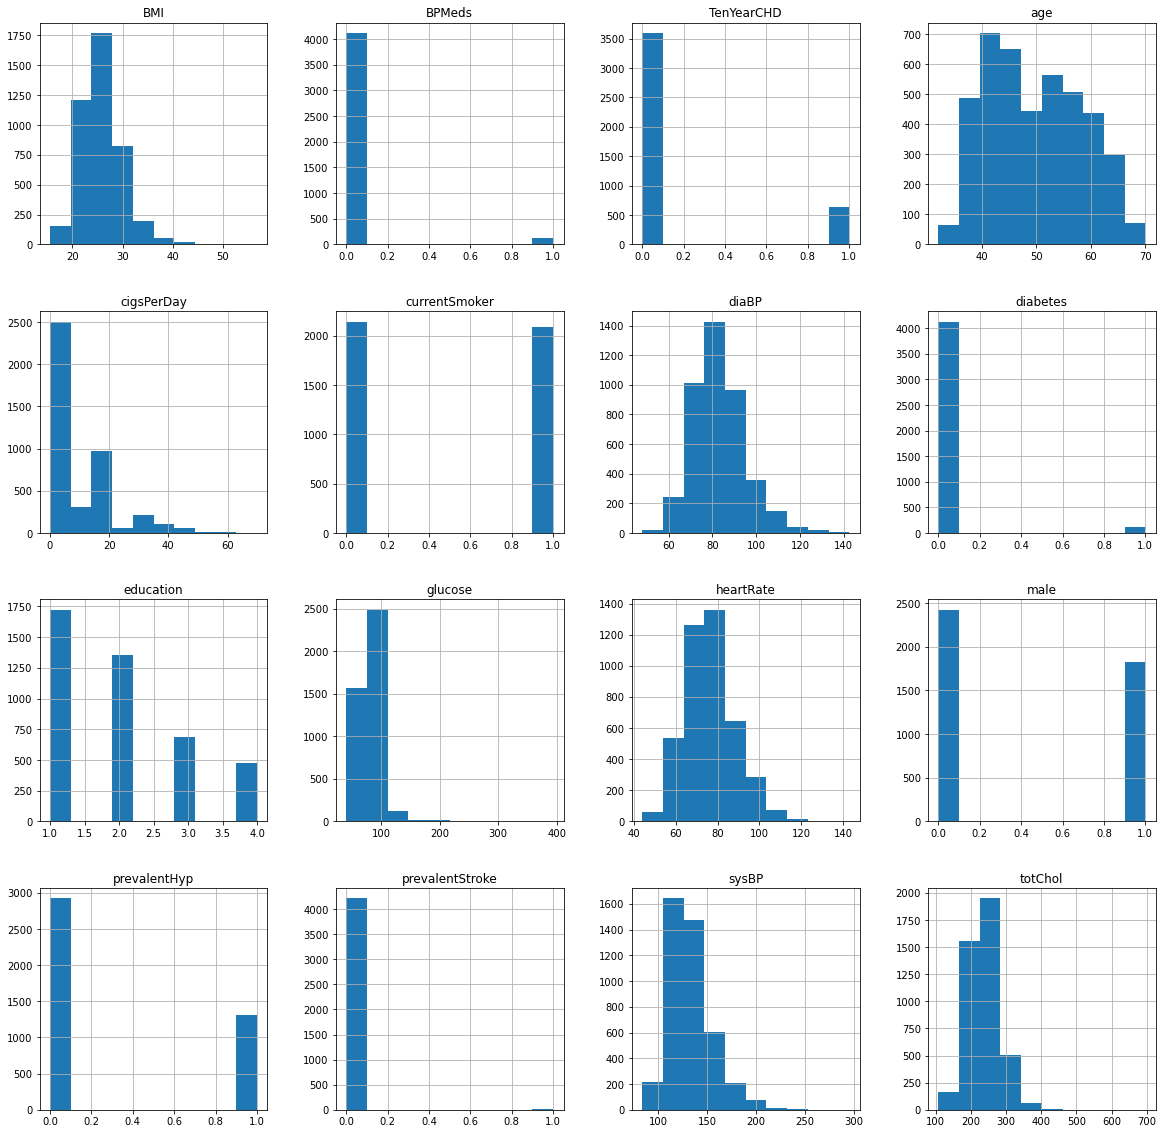

In [9]:
df.hist(figsize=(20, 20))
plt.show()

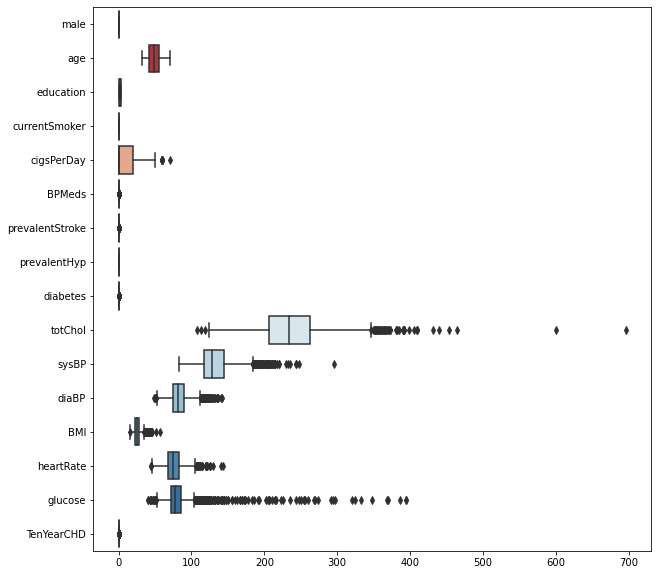

In [10]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,palette='RdBu',orient='h')

<h4> Split data

In [11]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler
stdc = StandardScaler()
X_train = stdc.fit_transform(X_train)
X_test = stdc.transform(X_test)

# <h1> Logistic Regression

In [14]:
from sklearn.metrics import roc_curve,roc_auc_score,classification_report,accuracy_score

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)

preds = lr.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       710
           1       0.82      0.07      0.12       138

    accuracy                           0.85       848
   macro avg       0.83      0.53      0.52       848
weighted avg       0.84      0.85      0.79       848



<h4> Roc

AUC: 0.74


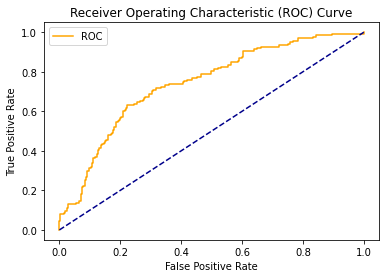

In [15]:
import numpy as np


def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
probs = lr.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

In [16]:
cross_val_score(lr,X_test,y_test,cv=10).mean()

0.832549019607843

# <h1> Kneighbors Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train,y_train)
result = knn.predict(X_test)
print(classification_report(y_test, result))


              precision    recall  f1-score   support

           0       0.85      0.98      0.91       710
           1       0.48      0.09      0.15       138

    accuracy                           0.84       848
   macro avg       0.66      0.53      0.53       848
weighted avg       0.79      0.84      0.79       848



AUC: 0.64


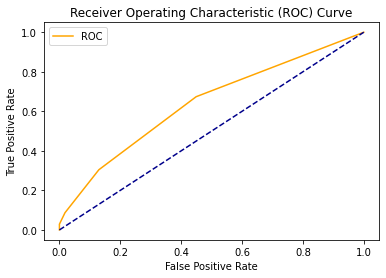

In [18]:
#ROC
probs = knn.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

In [19]:
#Knn model tuning
knn_params ={"n_neighbors": np.arange(1,10), "metric": ["euclidean","minkowski","manhattan"]}
knn_cv_model = GridSearchCV(knn,knn_params, cv=10,n_jobs=-1, verbose=2).fit(X_train,y_train)
knn_cv_model.score(X_test,y_test)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    6.9s finished


0.839622641509434

In [20]:
knn_cv_model.best_params_

{'metric': 'euclidean', 'n_neighbors': 8}

In [21]:
#Knn tuned model
knn_tuned = KNeighborsClassifier(metric='euclidean',n_neighbors=8).fit(X_train,y_train)

result = knn_tuned.predict(X_test)

print(classification_report(y_test, result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       710
           1       0.67      0.03      0.06       138

    accuracy                           0.84       848
   macro avg       0.75      0.51      0.48       848
weighted avg       0.81      0.84      0.77       848



AUC: 0.65


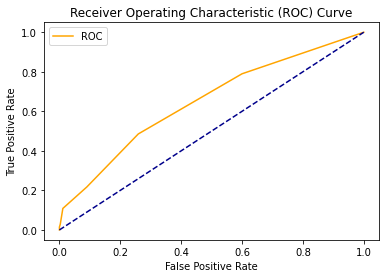

In [22]:
#ROC
probs = knn_tuned.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# <h1> SVM

In [23]:
from sklearn.svm import SVC
svm_model = SVC().fit(X_train,y_train)
result = svm_model.predict(X_test)
print(classification_report(y_test, result))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       710
           1       1.00      0.01      0.01       138

    accuracy                           0.84       848
   macro avg       0.92      0.50      0.46       848
weighted avg       0.86      0.84      0.77       848



In [24]:
#svm model tuning
svm = SVC() 
svm_params ={"C": [0.1,1,2,3],"kernel": ["rbf","poly"],"degree" : [0, 1, 2,3,4]}
svm_cv_model = GridSearchCV(svm,svm_params,cv=10, n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   56.4s finished


In [25]:
svm_cv_model.best_score_

0.8519174041297936

In [26]:
svm_cv_model.best_params_

{'C': 2, 'degree': 3, 'kernel': 'poly'}

In [27]:
#svm tuned model
svm_tuned = SVC(C=2, kernel= "poly",degree=3).fit(X_train,y_train)
result = svm_tuned.predict(X_test)
print(classification_report(y_test, result))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       710
           1       0.68      0.11      0.19       138

    accuracy                           0.85       848
   macro avg       0.77      0.55      0.55       848
weighted avg       0.82      0.85      0.80       848



# <h1> MLPClassifier

In [28]:
from sklearn.neural_network import MLPClassifier

mlpc_model = MLPClassifier(activation="logistic").fit(X_train,y_train)
result = mlpc_model.predict(X_test)
accuracy_score(y_test,result)

0.8443396226415094

In [29]:
mlpc_params={"alpha": [0.1,0.01,0.03],"hidden_layer_sizes": [(10,10),(100,100,100),(3,5)],"solver": ["lbfgs","adam"]}

In [30]:
#mlpc tuning
mlpc=MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc,mlpc_params ,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.9min finished
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [31]:
mlpc_cv_model.best_score_

0.8533923303834807

In [32]:
mlpc_cv_model.best_params_

{'alpha': 0.03, 'hidden_layer_sizes': (3, 5), 'solver': 'lbfgs'}

In [33]:
#mlpc tuned
mlpc_tuned = MLPClassifier(activation="logistic",alpha=0.1,hidden_layer_sizes=(3,5),solver="adam").fit(X_train,y_train)
result = mlpc_tuned.predict(X_test)
accuracy_score(y_test,result)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8372641509433962

# <h1> DecisionTreeClassifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
cart_model = DecisionTreeClassifier().fit(X_train,y_train)
result = cart_model.predict(X_test)
accuracy_score(y_test,result)

0.7653301886792453

In [35]:
cart = DecisionTreeClassifier()
cart_params={"max_depth": [1,3,5,7],"min_samples_split": [2,3,6,10,15,20]}

In [36]:
cart_cv_model = GridSearchCV(cart,cart_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.9s finished


In [37]:
cart_cv_model.best_params_

{'max_depth': 1, 'min_samples_split': 2}

In [38]:
cart_tuned = DecisionTreeClassifier(max_depth=1,min_samples_split=2).fit(X_train,y_train)

In [39]:
result = cart_tuned.predict(X_test)
accuracy_score(y_test,result)

0.8372641509433962

# <h1> Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rf_model = RandomForestClassifier().fit(X_train,y_train)

In [41]:
result = rf_model.predict(X_test)
accuracy_score(y_test,result)

0.8384433962264151

In [42]:
#rf model tuning
rf = RandomForestClassifier()
rf_params = {"n_estimators": [100,200,500,1000],
            "max_features": [1,3,5,7],
            "min_samples_split": [2,5,7]}
rf_cv_model = GridSearchCV(rf,rf_params,cv=10, n_jobs=-1,verbose=2).fit(X_train,y_train)


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  9.1min finished


In [43]:
rf_cv_model.best_params_

{'max_features': 1, 'min_samples_split': 5, 'n_estimators': 200}

In [44]:
rf_tuned = RandomForestClassifier(max_features= 1,min_samples_split= 7,n_estimators=200).fit(X_train,y_train)
result = rf_tuned.predict(X_test)
accuracy_score(y_test,result)

0.8384433962264151

# <h1>GBM

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier().fit(X_train,y_train)

In [46]:
result = gbm_model.predict(X_test)
accuracy_score(y_test,result)

0.839622641509434

In [47]:
#GBM model tuning
gbm = GradientBoostingClassifier()
gbm_params = {"learning_rate": [0.1,0.001,0.05],
              "n_estimators": [100,500,1000],
              "max_depth": [2,3,5,8]}
gbm_cv_model= GridSearchCV(gbm,gbm_params,cv=10, n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 11.0min finished


In [48]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}

In [49]:
gbm_tuned = GradientBoostingClassifier(learning_rate=0.001,max_depth=2,n_estimators=100).fit(X_train,y_train)
result = gbm_tuned.predict(X_test)
accuracy_score(y_test,result)

0.8372641509433962

# <h1> XGBClassifier

In [50]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier().fit(X_train,y_train)

In [51]:
result = xgb_model.predict(X_test)
accuracy_score(y_test,result)

0.8360849056603774

In [52]:
xgb = XGBClassifier()
xgb_params = {"learning_rate": [0.1,0.001,0.05],
              "n_estimators": [100,500,1000,2000],
              "max_depth": [2,3,5,8]}

In [53]:
xgb_cv_model = GridSearchCV(xgb,xgb_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  8.3min finished


In [54]:
xgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}

In [55]:
xgb_tuned = XGBClassifier(learning_rate= 0.1,max_depth= 2,n_estimators= 100).fit(X_train,y_train)

In [56]:
result = xgb_tuned.predict(X_test)
accuracy_score(y_test,result)

0.8419811320754716

# <h1> LGBMClassifier

In [57]:
from lightgbm import LGBMClassifier

In [58]:
lgbm_model = LGBMClassifier().fit(X_train,y_train)
lgbm_model

LGBMClassifier()

In [59]:
result = lgbm_model.predict(X_test)
accuracy_score(y_test,result)

0.8443396226415094

In [60]:
lgbm = LGBMClassifier()
lgbm_params= {"learning_rate": [0.1,0.001,0.05],
              "n_estimators": [100,500,1000],
              "max_depth": [2,3,5,8]}
lgbm_cv_model = GridSearchCV(lgbm,lgbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.1min finished


In [61]:
result = lgbm_model.predict(X_test)
accuracy_score(y_test,result)

0.8443396226415094

In [62]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [63]:
lgbm_tuned = LGBMClassifier(learning_rate=0.1,max_depth=3,n_estimators=100).fit(X_train,y_train)
result = lgbm_model.predict(X_test)
accuracy_score(y_test,result)

0.8443396226415094